In [1]:
import fsps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt

In [3]:
sp = fsps.StellarPopulation()
#zcontinuos=0

In [4]:
sp.libraries
#Explicar

(b'mist', b'miles', b'DL07')

In [5]:
print("Bibliotecas actuales:", sp.libraries)

Bibliotecas actuales: (b'mist', b'miles', b'DL07')


In [6]:
i=1
for  param in sp.params.all_params:
    print(f"{i}.- {param}: {sp.params[param]}")
    i=i+1

1.- imf_type: 2
2.- imf_upper_limit: 120
3.- imf_lower_limit: 0.08
4.- imf1: 1.3
5.- imf2: 2.3
6.- imf3: 2.3
7.- vdmc: 0.08
8.- mdave: 0.5
9.- dell: 0.0
10.- delt: 0.0
11.- sbss: 0.0
12.- fbhb: 0.0
13.- pagb: 1.0
14.- add_stellar_remnants: True
15.- tpagb_norm_type: 2
16.- add_agb_dust_model: True
17.- agb_dust: 1.0
18.- redgb: 1.0
19.- agb: 1.0
20.- masscut: 150.0
21.- fcstar: 1.0
22.- evtype: -1
23.- use_wr_spectra: 1
24.- logt_wmb_hot: 0.0
25.- add_xrb_emission: 0
26.- frac_xrb: 1.0
27.- smooth_lsf: False
28.- smooth_velocity: True
29.- redshift_colors: False
30.- compute_light_ages: False
31.- nebemlineinspec: True
32.- dust_type: 0
33.- add_dust_emission: True
34.- add_neb_emission: False
35.- add_neb_continuum: True
36.- cloudy_dust: False
37.- add_igm_absorption: False
38.- zmet: 1
39.- sfh: 0
40.- wgp1: 1
41.- wgp2: 1
42.- wgp3: 1
43.- tau: 1.0
44.- const: 0.0
45.- tage: 0.0
46.- fburst: 0.0
47.- tburst: 11.0
48.- dust1: 0.0
49.- dust2: 0.0
50.- dust3: 0.0
51.- logzsol: 0.0
52.

In [7]:
ssp_ages= np.linspace(0, 13.8,107)

# Magnitudes

In [8]:
sdss_bands= fsps.find_filter('sdss')
print(sdss_bands)

['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']


In [9]:
bandas=[]
bandas.append(sdss_bands)
sdss_bands.append('galex_nuv')
sdss_bands.append('2mass_ks')

In [10]:
bandas=sdss_bands

In [11]:
print(bandas)
print()

['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z', 'galex_nuv', '2mass_ks']



In [12]:
magnitudes=[]
for band in bandas:
    magnitudes.append(sp.get_mags(bands=[band])[:,0])

In [13]:
magnitudes=np.array(magnitudes)

In [14]:
mags_u=magnitudes[0]
mags_g=magnitudes[1]
mags_r=magnitudes[2]
mags_i=magnitudes[3]
mags_z=magnitudes[4]

mags_nuv=magnitudes[5]
mags_ks=magnitudes[6]

In [15]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "text.usetex": True,
    "font.size": 14,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

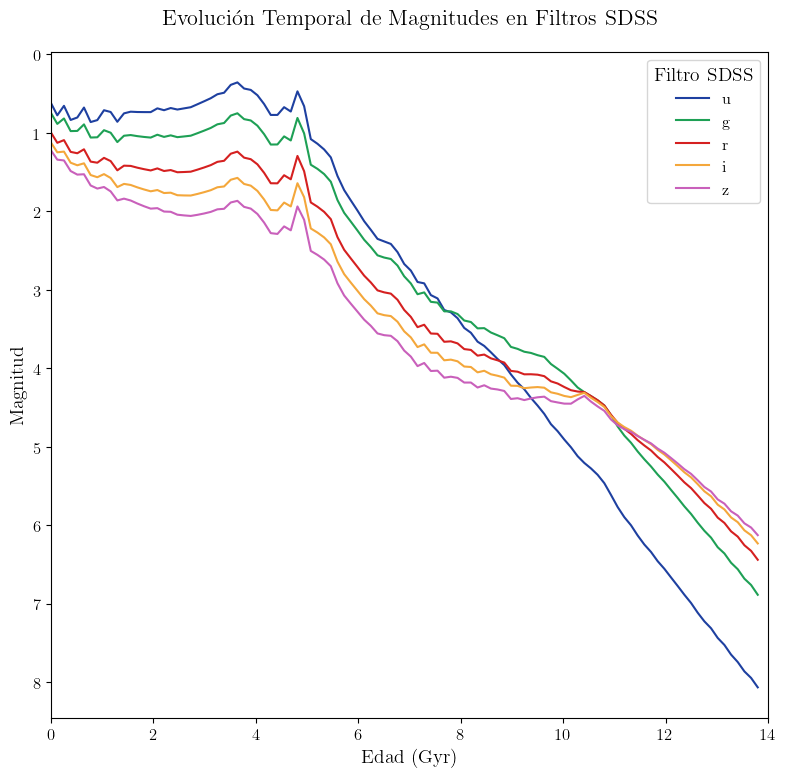

In [16]:
plt.figure(figsize=(8,8))
plt.plot(ssp_ages, mags_u, label='u', linestyle='-', color='#1e40a0')
plt.plot(ssp_ages, mags_g, label='g', linestyle='-', color='#1ea055')
plt.plot(ssp_ages, mags_r, label='r', linestyle='-', color='#d52020')
plt.plot(ssp_ages, mags_i, label='i', linestyle='-', color='#f4a73b')
plt.plot(ssp_ages, mags_z, label='z', linestyle='-', color='#c960bb')

plt.xlabel(r'Edad (Gyr)')
plt.ylabel(r'Magnitud')
plt.title(r'Evolución Temporal de Magnitudes en Filtros SDSS', pad=20)
plt.gca().invert_yaxis()
plt.legend(title=r'Filtro SDSS', loc='upper right', fontsize='small')
plt.grid(False)
plt.tight_layout()
plt.xlim(0,14) 
plt.savefig('magnitudes.jpg', format='jpg',dpi=300)
plt.show()

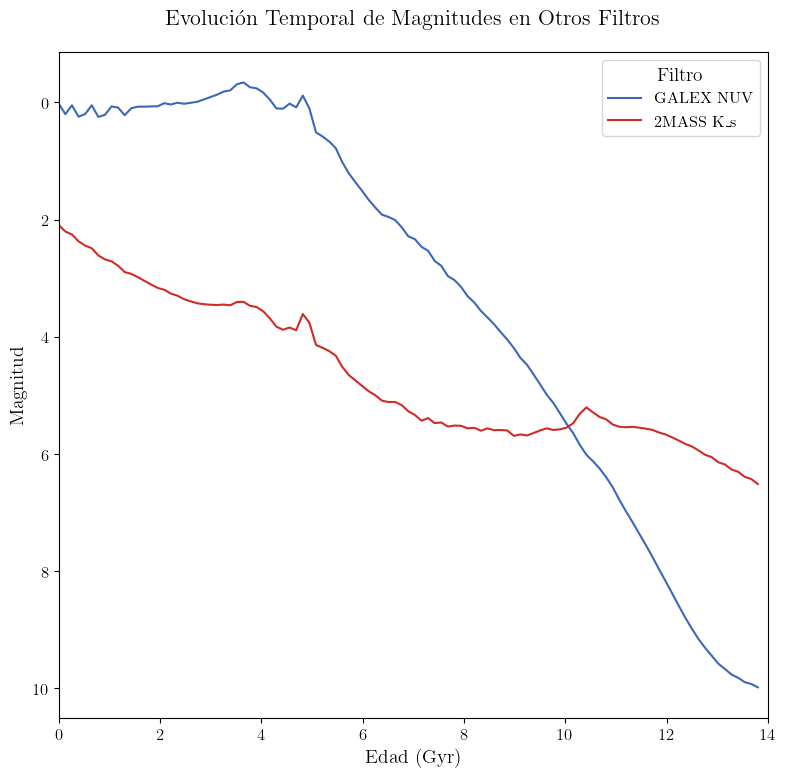

In [17]:
plt.figure(figsize=(8,8))

plt.plot(ssp_ages, mags_nuv, label='GALEX NUV', color='#3b68b9')
plt.plot(ssp_ages, mags_ks, label='2MASS K_s', color='#d02b25')

plt.xlabel(r'Edad (Gyr)')
plt.ylabel(r'Magnitud')
plt.title(r'Evolución Temporal de Magnitudes en Otros Filtros', pad=20)
plt.gca().invert_yaxis()
plt.legend(title=r'Filtro', loc='upper right', fontsize='small')
plt.grid(False)
plt.tight_layout()
plt.xlim(0,14) 
plt.savefig('magnitudes2.jpg', format='jpg',dpi=300)
plt.show()


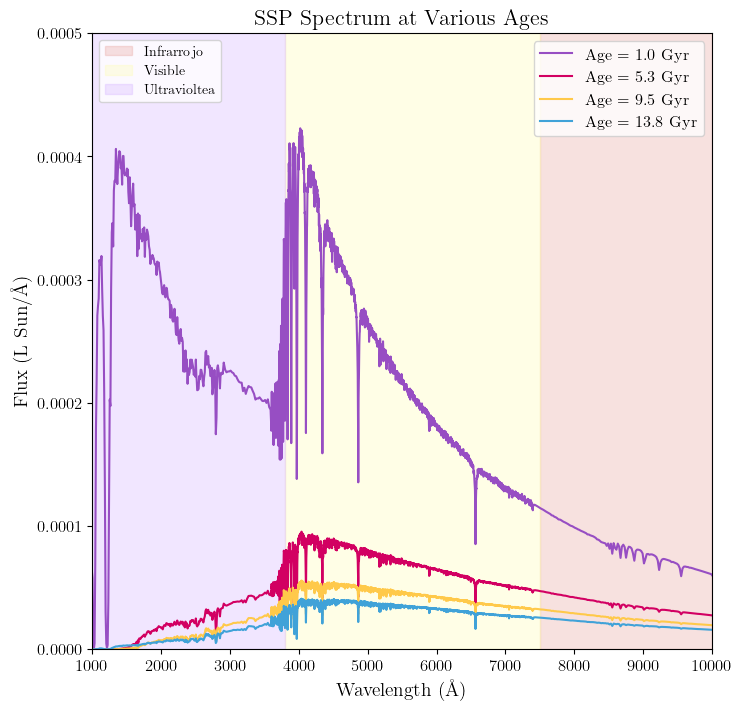

In [18]:
ages=np.linspace(1,13.8,4)

plt.figure(figsize=(8,8))
ir=plt.axvspan(7500, 10000, color='#E79D96', alpha=0.3,  label='Infrarrojo')
vis=plt.axvspan(3800, 7500, color='#FFFEAD', alpha=0.3, label='Visible')
uv=plt.axvspan(1000, 3800, color='#d2adff', alpha=0.3, label='Ultravioltea')

colors=['#974EC3','#D20062','#FFC94A','#40A2D8','#D2DE32']
edades=[]

for age,color in zip(ages,colors):
    spectrum = sp.get_spectrum(tage=age, peraa='True')[1]
    line, = plt.plot(sp.wavelengths, spectrum, label=f"Age = {age:.1f} Gyr", color=color)
    edades.append(line)
    
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (L Sun/Å)")
plt.title("SSP Spectrum at Various Ages")
plt.xlim(1000,10000) 
plt.ylim(0,0.0005)
legend1 = plt.legend(handles=edades, loc='upper right', fontsize='small')
plt.gca().add_artist(legend1)
plt.legend(handles=[ir,vis,uv], loc='upper left',prop={'size': 10})
plt.grid(False)
plt.savefig('flujo.jpg', format='jpg',dpi=300)
plt.show()

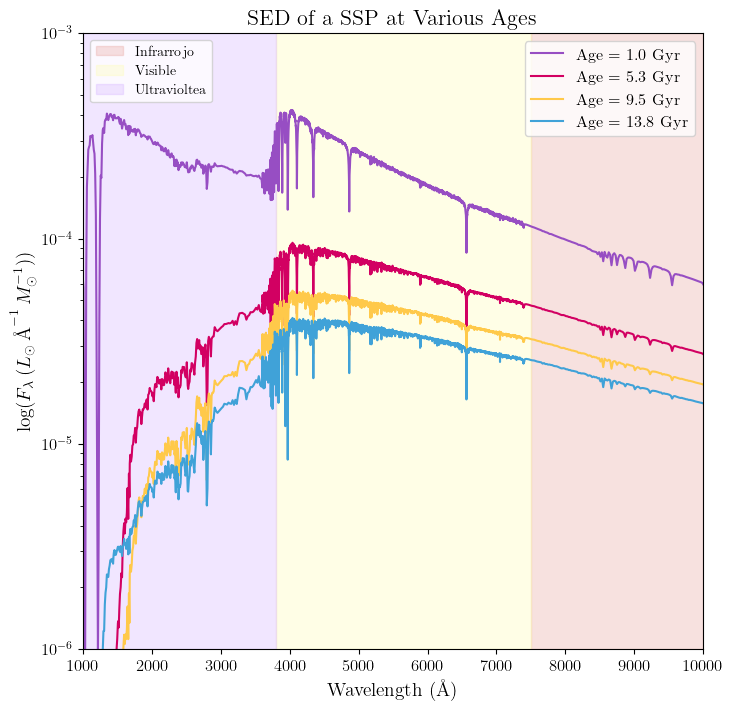

In [19]:
ages=np.linspace(1,13.8,4)

plt.figure(figsize=(8,8))
ir=plt.axvspan(7500, 10000, color='#E79D96', alpha=0.3,  label='Infrarrojo')
vis=plt.axvspan(3800, 7500, color='#FFFEAD', alpha=0.3, label='Visible')
uv=plt.axvspan(1000, 3800, color='#d2adff', alpha=0.3, label='Ultravioltea')

colors=['#974EC3','#D20062','#FFC94A','#40A2D8']
edades=[]

for age,color in zip(ages,colors):
    spectrum = sp.get_spectrum(tage=age, peraa=True)[1]
    line, = plt.plot(sp.wavelengths, spectrum, label=f"Age = {age:.1f} Gyr", color=color)
    edades.append(line)
    
plt.xlabel("Wavelength (Å)")
plt.ylabel("log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)")

plt.title("SED of a SSP at Various Ages")
plt.yscale('log')
plt.xlim(1000,10000) 
plt.ylim(10e-7,1e-3)
legend1 = plt.legend(handles=edades, loc='upper right', fontsize='small')
plt.gca().add_artist(legend1)
plt.legend(handles=[ir,vis,uv], loc='upper left',prop={'size': 10})
plt.grid(False)
plt.savefig('flujo(log).jpg', format='jpg',dpi=300)
plt.show()

# Variando metalicidad

In [20]:
print(sp.zlegend)

[4.49043431e-05 1.42000001e-04 2.52515678e-04 4.49043431e-04
 7.98524687e-04 1.42000001e-03 2.52515678e-03 4.49043431e-03
 7.98524687e-03 1.42000001e-02 2.52515678e-02 4.49043431e-02]


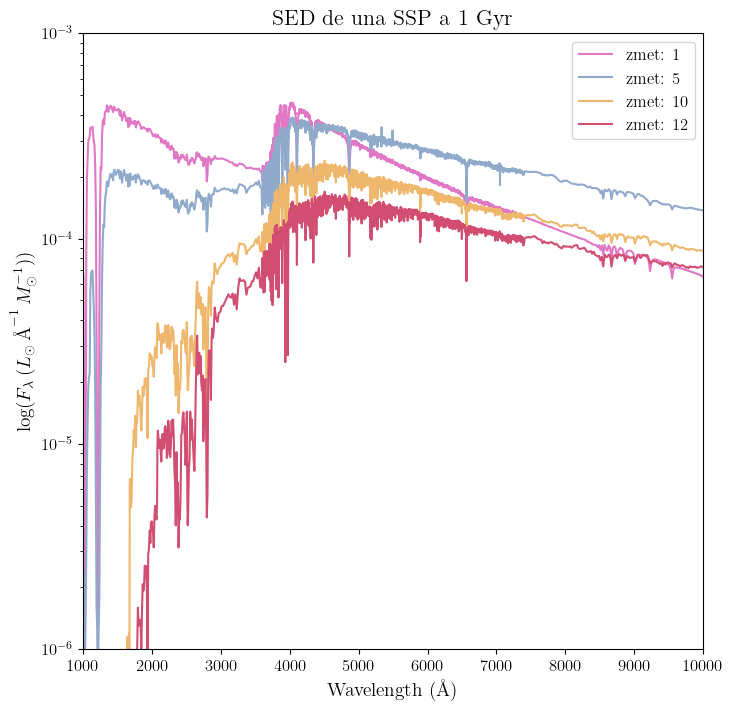

In [21]:
plt.figure(figsize=(8,8))
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=1)
age=1.0
zmet=1  
Zmet=4.49043431e-05
wave1, spectrum1 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave1, spectrum1, label=f'zmet: {zmet:}', color ='#E178C5') #rosado

###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=5)
age=1.0
zmet=5
Zmet=7.98524687e-04
wave2, spectrum2 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave2, spectrum2, label=f'zmet: {zmet:}',color='#90AACB') #celeste gris

#################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=10)
age=1.0
zmet=10
Zmet= 1.42000001e-02
wave3, spectrum3 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave3, spectrum3, label=f'zmet: {zmet:}', color ='#EEB76B') #mostaza
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=12)
age=1.0
zmet=12
Zmet=4.49043431e-02
wave4, spectrum4 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave4, spectrum4, label=f'zmet: {zmet:}', color='#D14D72') #morado
##################################################################

plt.xlabel('Wavelength (Å)')
plt.ylabel(r'log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)')
plt.yscale('log')
plt.title('SED de una SSP a 1 Gyr')
plt.xlim(1000,10000)
plt.ylim(10e-7,1e-3)
plt.legend()
plt.grid(False)
plt.savefig('flujo_1_Gyr_distintas_metalicidades.jpg', format='jpg',dpi=300)
plt.show()

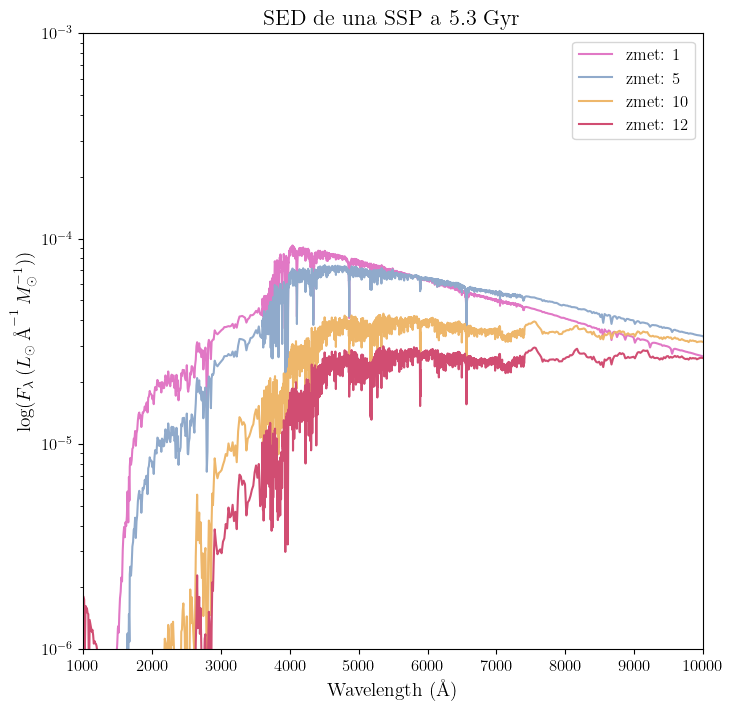

In [22]:
plt.figure(figsize=(8,8))
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=1)
age=5.3
zmet=1  
Zmet=4.49043431e-05
wave1, spectrum1 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave1, spectrum1, label=f'zmet: {zmet:}', color ='#E178C5') #rosado

###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=5)
age=5.3
zmet=5
Zmet=7.98524687e-04
wave2, spectrum2 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave2, spectrum2, label=f'zmet: {zmet:}',color='#90AACB') #celeste gris

#################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=10)
age=5.3
zmet=10
Zmet= 1.42000001e-02
wave3, spectrum3 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave3, spectrum3, label=f'zmet: {zmet:}', color ='#EEB76B') #mostaza
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=12)
age=5.3
zmet=12
Zmet=4.49043431e-02
wave4, spectrum4 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave4, spectrum4, label=f'zmet: {zmet:}', color='#D14D72') #morado
##################################################################

plt.xlabel('Wavelength (Å)')
plt.ylabel(r'log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)')
plt.yscale('log')
plt.title('SED de una SSP a 5.3 Gyr')
plt.xlim(1000,10000)
plt.ylim(10e-7,1e-3)
plt.legend()
plt.grid(False)
plt.savefig('flujo_5.3_Gyr_distintas_metalicidades.jpg', format='jpg',dpi=300)
plt.show()

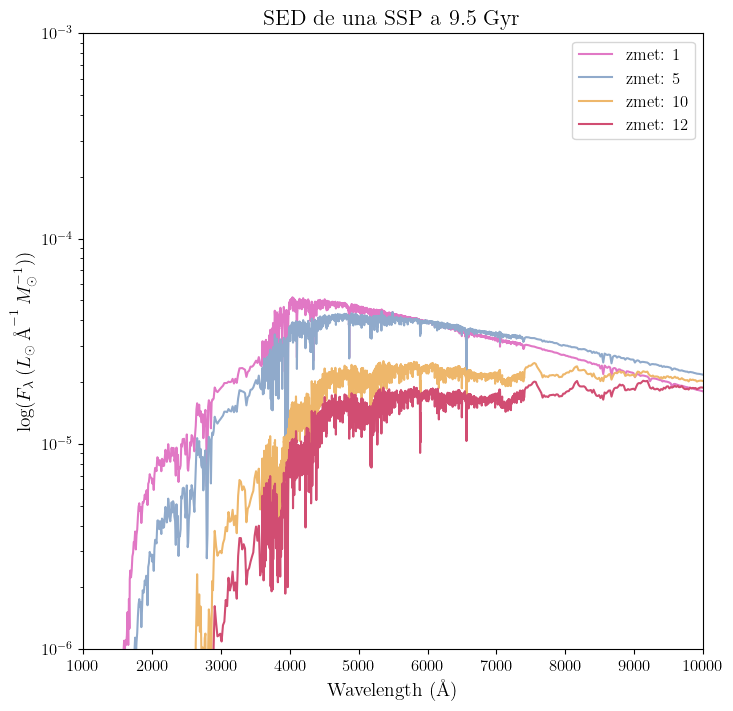

In [23]:
plt.figure(figsize=(8,8))
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=1)
age=9.5
zmet=1  
Zmet=4.49043431e-05
wave1, spectrum1 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave1, spectrum1, label=f'zmet: {zmet:}', color ='#E178C5') #rosado

###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=5)
age=9.5
zmet=5
Zmet=7.98524687e-04
wave2, spectrum2 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave2, spectrum2, label=f'zmet: {zmet:}',color='#90AACB') #celeste gris

#################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=10)
age=9.5
zmet=10
Zmet= 1.42000001e-02
wave3, spectrum3 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave3, spectrum3, label=f'zmet: {zmet:}', color ='#EEB76B') #mostaza
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=12)
age=9.5
zmet=12
Zmet=4.49043431e-02
wave4, spectrum4 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave4, spectrum4, label=f'zmet: {zmet:}', color='#D14D72') #morado
##################################################################

plt.xlabel('Wavelength (Å)')
plt.ylabel(r'log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)')
plt.yscale('log')
plt.title('SED de una SSP a 9.5 Gyr')
plt.xlim(1000,10000)
plt.ylim(10e-7,1e-3)
plt.legend()
plt.grid(False)
plt.savefig('flujo_9.5_Gyr_distintas_metalicidades.jpg', format='jpg',dpi=300)
plt.show()

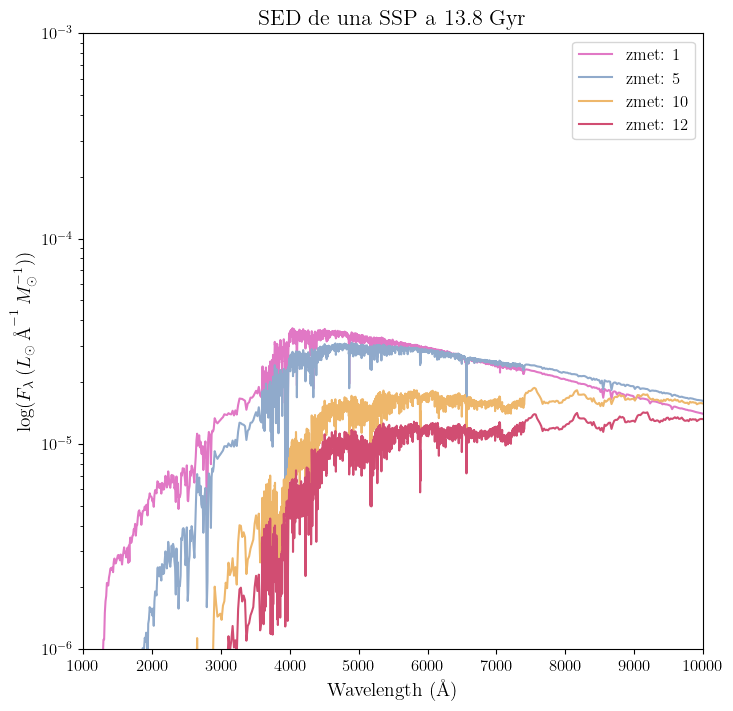

In [24]:
plt.figure(figsize=(8,8))
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=1)
age=13.8
zmet=1  
Zmet=4.49043431e-05
wave1, spectrum1 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave1, spectrum1, label=f'zmet: {zmet:}', color ='#E178C5') #rosado

###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=5)
age=13.8
zmet=5
Zmet=7.98524687e-04
wave2, spectrum2 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave2, spectrum2, label=f'zmet: {zmet:}',color='#90AACB') #celeste gris

#################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=10)
age=13.8
zmet=10
Zmet= 1.42000001e-02
wave3, spectrum3 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave3, spectrum3, label=f'zmet: {zmet:}', color ='#EEB76B') #mostaza
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=12)
age=13.8
zmet=12
Zmet=4.49043431e-02
wave4, spectrum4 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave4, spectrum4, label=f'zmet: {zmet:}', color='#D14D72') #morado
##################################################################

plt.xlabel('Wavelength (Å)')
plt.ylabel(r'log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)')
plt.yscale('log')
plt.title('SED de una SSP a 13.8 Gyr')
plt.xlim(1000,10000)
plt.ylim(10e-7,1e-3)
plt.legend()
plt.grid(False)
plt.savefig('flujo_13.8_Gyr_distintas_metalicidades.jpg', format='jpg',dpi=300)
plt.show()

In [25]:
from PIL import Image

imagenes = ['flujo_1_Gyr_distintas_metalicidades.jpg','flujo_5.3_Gyr_distintas_metalicidades.jpg','flujo_9.5_Gyr_distintas_metalicidades.jpg','flujo_13.8_Gyr_distintas_metalicidades.jpg']

images = [Image.open(imagen) for imagen in imagenes]
width, height = images[0].size
combined_image = Image.new('RGB', (width * 2, height * 2))
combined_image.paste(images[0], (0, 0))
combined_image.paste(images[1], (width, 0))
combined_image.paste(images[2], (0, height))
combined_image.paste(images[3], (width, height))
combined_image.save('Cuadrícula_Distintas_Metalicidades.pdf')

In [26]:
i=1
for  param in sp.params.all_params:
    print(f"{i}.- {param}: {sp.params[param]}")
    i=i+1

1.- imf_type: 3
2.- imf_upper_limit: 120
3.- imf_lower_limit: 0.08
4.- imf1: 1.3
5.- imf2: 2.3
6.- imf3: 2.3
7.- vdmc: 0.08
8.- mdave: 0.5
9.- dell: 0.0
10.- delt: 0.0
11.- sbss: 0.0
12.- fbhb: 0.0
13.- pagb: 1.0
14.- add_stellar_remnants: True
15.- tpagb_norm_type: 2
16.- add_agb_dust_model: True
17.- agb_dust: 1.0
18.- redgb: 1.0
19.- agb: 1.0
20.- masscut: 150.0
21.- fcstar: 1.0
22.- evtype: -1
23.- use_wr_spectra: 1
24.- logt_wmb_hot: 0.0
25.- add_xrb_emission: 0
26.- frac_xrb: 1.0
27.- smooth_lsf: False
28.- smooth_velocity: True
29.- redshift_colors: False
30.- compute_light_ages: False
31.- nebemlineinspec: True
32.- dust_type: 0
33.- add_dust_emission: True
34.- add_neb_emission: False
35.- add_neb_continuum: True
36.- cloudy_dust: False
37.- add_igm_absorption: False
38.- zmet: 12
39.- sfh: 0
40.- wgp1: 1
41.- wgp2: 1
42.- wgp3: 1
43.- tau: 1.0
44.- const: 0.0
45.- tage: 13.8
46.- fburst: 0.0
47.- tburst: 11.0
48.- dust1: 0.0
49.- dust2: 0.0
50.- dust3: 0.0
51.- logzsol: 0.0
5

# Definición de Parámetros

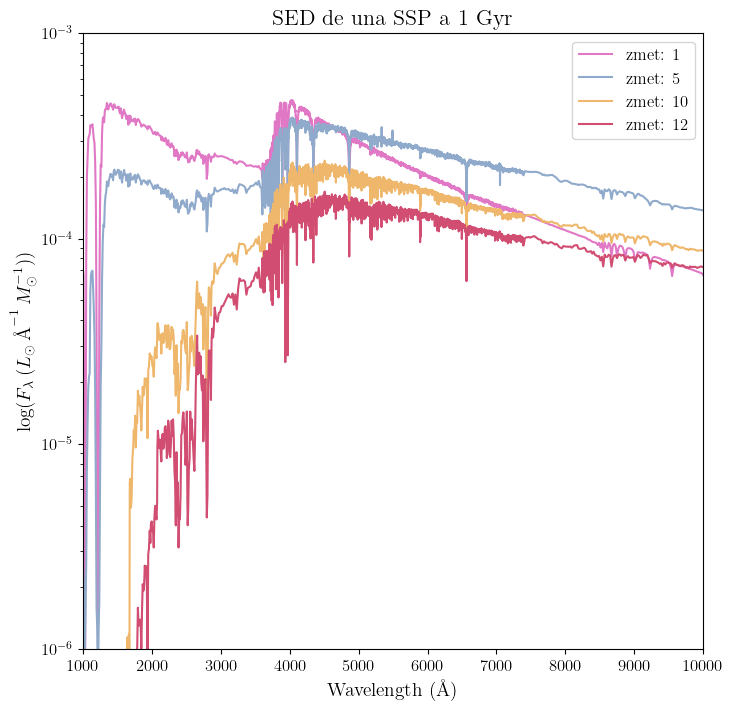

In [27]:
plt.figure(figsize=(8,8))
###################################################################
sp = fsps.StellarPopulation(imf_type=3, imf_upper_limit=100, imf_lower_limit=0.1,zcontinuous=0, zmet=1, sfh=0, )
age=1.0
zmet=1  
Zmet=4.49043431e-05
wave1, spectrum1 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave1, spectrum1, label=f'zmet: {zmet:}', color ='#E178C5') #rosado

###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=5)
age=1.0
zmet=5
Zmet=7.98524687e-04
wave2, spectrum2 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave2, spectrum2, label=f'zmet: {zmet:}',color='#90AACB') #celeste gris

#################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=10)
age=1.0
zmet=10
Zmet= 1.42000001e-02
wave3, spectrum3 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave3, spectrum3, label=f'zmet: {zmet:}', color ='#EEB76B') #mostaza
###################################################################
sp = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=12)
age=1.0
zmet=12
Zmet=4.49043431e-02
wave4, spectrum4 = sp.get_spectrum(tage=age, peraa=True)
plt.plot(wave4, spectrum4, label=f'zmet: {zmet:}', color='#D14D72') #morado
##################################################################

plt.xlabel('Wavelength (Å)')
plt.ylabel(r'log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)')
plt.yscale('log')
plt.title('SED de una SSP a 1 Gyr')
plt.xlim(1000,10000)
plt.ylim(10e-7,1e-3)
plt.legend()
plt.grid(False)
plt.savefig('flujo_1_Gyr_distintas_metalicidades.jpg', format='jpg',dpi=300)
plt.show()

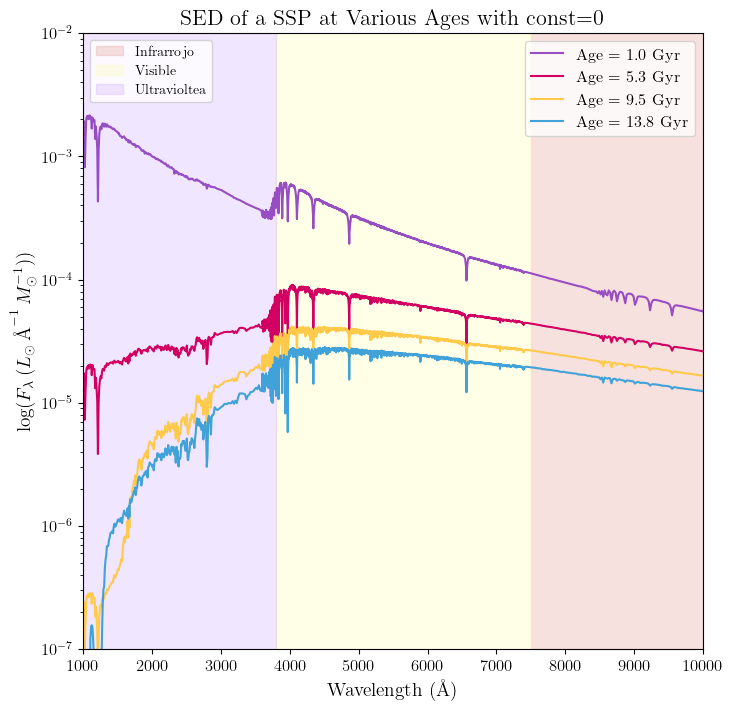

In [28]:
ages=np.linspace(1,13.8,4)

plt.figure(figsize=(8,8))
ir=plt.axvspan(7500, 10000, color='#E79D96', alpha=0.3,  label='Infrarrojo')
vis=plt.axvspan(3800, 7500, color='#FFFEAD', alpha=0.3, label='Visible')
uv=plt.axvspan(1000, 3800, color='#d2adff', alpha=0.3, label='Ultravioltea')

colors=['#974EC3','#D20062','#FFC94A','#40A2D8']
edades=[]
sp2 = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=1, imf_upper_limit=100, imf_lower_limit=0.1, sfh=1,tau=1,sf_start=0,sf_trunc=0, fburst = 0, tburst = 11, const = 0, dust1=1.0, dust2=0.3)
for age,color in zip(ages,colors):
    spectrum = sp2.get_spectrum(tage=age, peraa=True)[1]
    line, = plt.plot(sp2.wavelengths, spectrum, label=f"Age = {age:.1f} Gyr", color=color)
    edades.append(line)
    
plt.xlabel("Wavelength (Å)")
plt.ylabel("log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)")

plt.title("SED of a SSP at Various Ages with const=0")
plt.yscale('log')
plt.xlim(1000,10000) 
plt.ylim(10e-8,1e-2)
legend1 = plt.legend(handles=edades, loc='upper right', fontsize='small')
plt.gca().add_artist(legend1)
plt.legend(handles=[ir,vis,uv], loc='upper left',prop={'size': 10})
plt.grid(False)
plt.savefig('csp const=0.jpg', format='jpg',dpi=300)
plt.show()

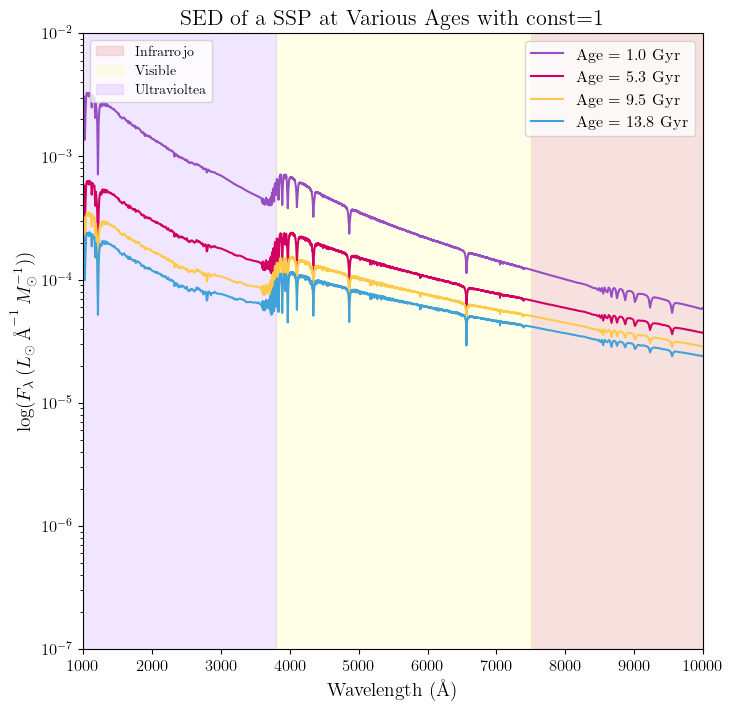

In [29]:
ages=np.linspace(1,13.8,4)

plt.figure(figsize=(8,8))
ir=plt.axvspan(7500, 10000, color='#E79D96', alpha=0.3,  label='Infrarrojo')
vis=plt.axvspan(3800, 7500, color='#FFFEAD', alpha=0.3, label='Visible')
uv=plt.axvspan(1000, 3800, color='#d2adff', alpha=0.3, label='Ultravioltea')

colors=['#974EC3','#D20062','#FFC94A','#40A2D8']
edades=[]
sp5 = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=1, imf_upper_limit=100, imf_lower_limit=0.1, sfh=1,tau=1,sf_start=0,sf_trunc=0, fburst = 0, tburst = 11, const = 1, dust1=1.0, dust2=0.3)
for age,color in zip(ages,colors):
    spectrum = sp5.get_spectrum(tage=age, peraa=True)[1]
    line, = plt.plot(sp5.wavelengths, spectrum, label=f"Age = {age:.1f} Gyr", color=color)
    edades.append(line)
    
plt.xlabel("Wavelength (Å)")
plt.ylabel("log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)")

plt.title("SED of a SSP at Various Ages with const=1")
plt.yscale('log')
plt.xlim(1000,10000) 
plt.ylim(10e-8,1e-2)
legend1 = plt.legend(handles=edades, loc='upper right', fontsize='small')
plt.gca().add_artist(legend1)
plt.legend(handles=[ir,vis,uv], loc='upper left',prop={'size': 10})
plt.grid(False)
plt.savefig('csp const=1.jpg', format='jpg',dpi=300)
plt.show()

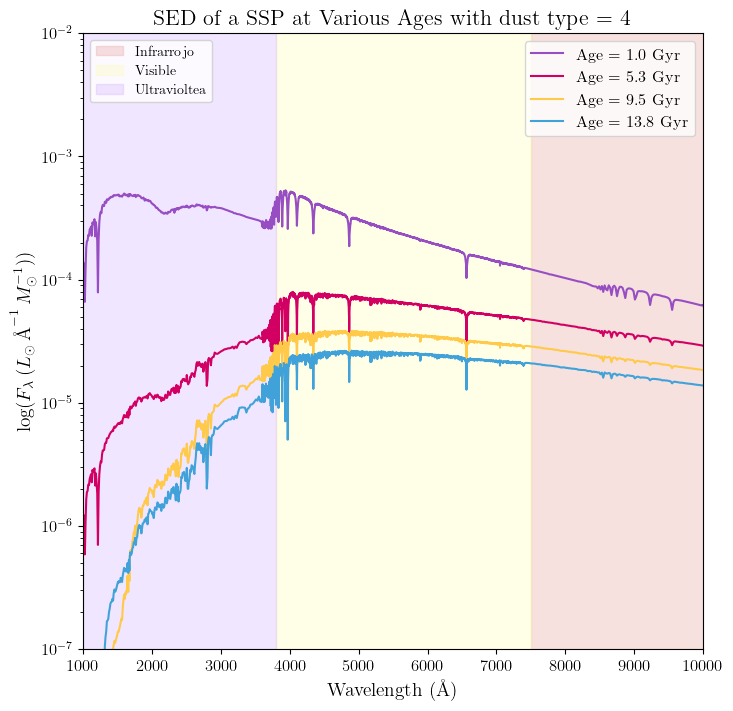

In [30]:
ages=np.linspace(1,13.8,4)

plt.figure(figsize=(8,8))
ir=plt.axvspan(7500, 10000, color='#E79D96', alpha=0.3,  label='Infrarrojo')
vis=plt.axvspan(3800, 7500, color='#FFFEAD', alpha=0.3, label='Visible')
uv=plt.axvspan(1000, 3800, color='#d2adff', alpha=0.3, label='Ultravioltea')

colors=['#974EC3','#D20062','#FFC94A','#40A2D8']
edades=[]
sp6 = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=1, imf_upper_limit=100, imf_lower_limit=0.1, sfh=1,tau=1,sf_start=0,sf_trunc=0, fburst = 0, tburst = 11, const = 0,dust_type=4, dust1=1.0, dust2=0.3)
for age,color in zip(ages,colors):
    spectrum = sp6.get_spectrum(tage=age, peraa=True)[1]
    line, = plt.plot(sp6.wavelengths, spectrum, label=f"Age = {age:.1f} Gyr", color=color)
    edades.append(line)
    
plt.xlabel("Wavelength (Å)")
plt.ylabel("log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)")

plt.title("SED of a SSP at Various Ages with dust type = 4")
plt.yscale('log')
plt.xlim(1000,10000) 
plt.ylim(10e-8,1e-2)
legend1 = plt.legend(handles=edades, loc='upper right', fontsize='small')
plt.gca().add_artist(legend1)
plt.legend(handles=[ir,vis,uv], loc='upper left',prop={'size': 10})
plt.grid(False)
plt.savefig('csp dusttype=4.jpg', format='jpg',dpi=300)
plt.show()

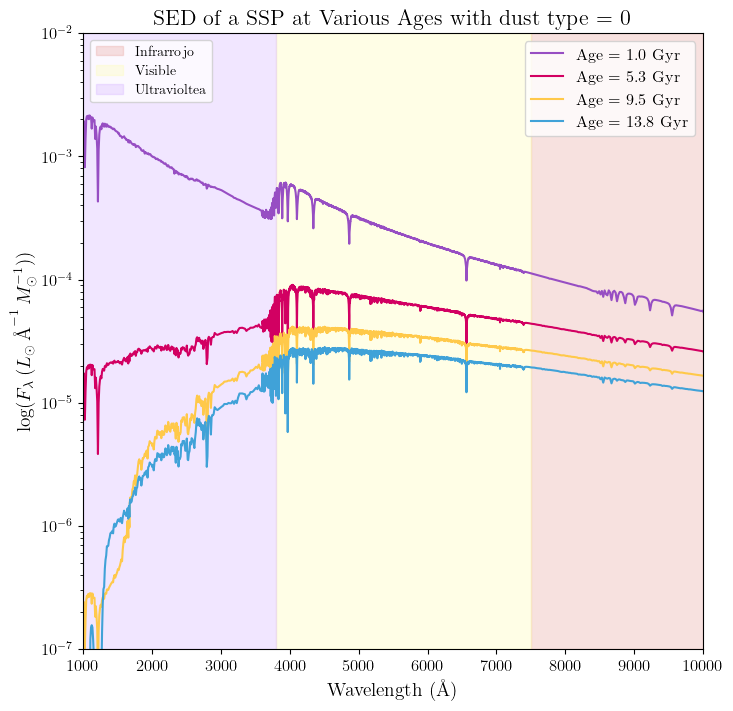

In [31]:
ages=np.linspace(1,13.8,4)

plt.figure(figsize=(8,8))
ir=plt.axvspan(7500, 10000, color='#E79D96', alpha=0.3,  label='Infrarrojo')
vis=plt.axvspan(3800, 7500, color='#FFFEAD', alpha=0.3, label='Visible')
uv=plt.axvspan(1000, 3800, color='#d2adff', alpha=0.3, label='Ultravioltea')

colors=['#974EC3','#D20062','#FFC94A','#40A2D8']
edades=[]
sp7 = fsps.StellarPopulation(imf_type=3,zcontinuous=0, zmet=1, imf_upper_limit=100, imf_lower_limit=0.1, sfh=1,tau=1,sf_start=0,sf_trunc=0, fburst = 0, tburst = 11, const = 0,dust_type=0, dust1=1.0, dust2=0.3)
for age,color in zip(ages,colors):
    spectrum = sp7.get_spectrum(tage=age, peraa=True)[1]
    line, = plt.plot(sp7.wavelengths, spectrum, label=f"Age = {age:.1f} Gyr", color=color)
    edades.append(line)
    
plt.xlabel("Wavelength (Å)")
plt.ylabel("log($F_\lambda \, (L_{\odot} \, \mathrm{\AA}^{-1} \, M_{\odot}^{-1})$)")

plt.title("SED of a SSP at Various Ages with dust type = 0")
plt.yscale('log')
plt.xlim(1000,10000) 
plt.ylim(10e-8,1e-2)
legend1 = plt.legend(handles=edades, loc='upper right', fontsize='small')
plt.gca().add_artist(legend1)
plt.legend(handles=[ir,vis,uv], loc='upper left',prop={'size': 10})
plt.grid(False)
plt.savefig('csp dusttype=0.jpg', format='jpg',dpi=300)
plt.show()

In [32]:

from PIL import Image

imagenes = ['csp dusttype=0.jpg', 'csp dusttype=4.jpg']

images = [Image.open(imagen) for imagen in imagenes]
width, height = images[0].size
combined_image = Image.new('RGB', (width * 2, height * 1))
combined_image.paste(images[0], (0, 0))
combined_image.paste(images[1], (width, 0))
combined_image.save('Cuadrícula_Distintas_polvo.pdf')